In [1]:
import pandas as pd
import xarray as xr
from windwhisper import windturbines

fp = "Clustered_Wind_Turbine_Data__1_5_km_Radius_.csv"
eu_turbines = pd.read_csv(fp)
eu_turbines = eu_turbines[eu_turbines["Offshore"] != 1]
print(len(eu_turbines))

# we can preload the wind speed data, otherwise, the tool will do it every time
filepath_wind_speed = "/Users/romain/GitHub/windwhisper/dev/fixtures/era5_mean_2013-2022_month_by_hour.nc"
filepath_correction = "/Users/romain/GitHub/windwhisper/dev/fixtures/ratio_gwa2_era5.nc"

def wind_speed_data():
    wind_speed = xr.open_dataset(filepath_wind_speed).to_array().mean(dim="month")
    return wind_speed

data = wind_speed_data()

# note: make ensure latitude and longitude coordinates are sorted in ascending order
elevation_data = xr.open_dataset("fixtures/Copernicus_DSM_90m_COG_EU.nc")


79108


In [2]:
wind_turbine_clusters = []
for c in eu_turbines["Cluster"].unique():
    wind_turbine_clusters.append(
        {
            f"Turbine {i}": {
                "diameter": row["Diameter_m"],
                "hub height": row["Hub_height_m"],
                "position": (row["Latitude"], row["Longitude"]),
                "power": row["P_rated_kW"],
            }
            for i, row in eu_turbines.loc[(eu_turbines["Cluster"] == c), :].iterrows()
        }
    )

In [14]:
noise_analysis.merged_map["ambient"].values.sum()

np.float64(51175.09926287681)

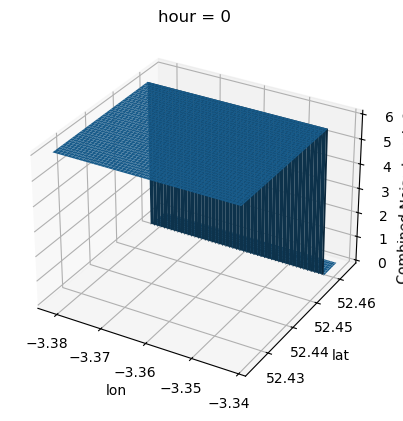

In [12]:
noise_analysis.merged_map["ambient"].plot.surface()

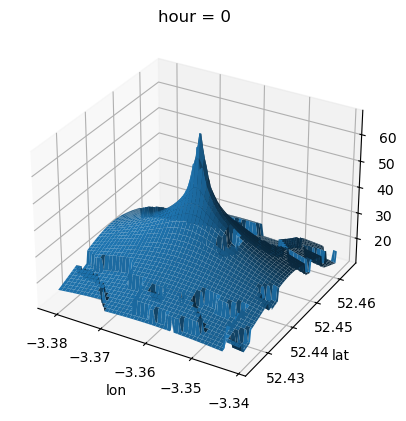

In [13]:
noise_analysis.merged_map["combined"].plot.surface()

In [3]:
len(wind_turbine_clusters)

10439

In [4]:
from windwhisper import WindTurbines, NoisePropagation, NoiseAnalysis, HumanHealth


results = []

for c, wind_turbines in enumerate(wind_turbine_clusters):

    wt = windturbines.WindTurbines(
        wind_turbines=wind_turbines,
        wind_speed_data=data,
    )

    noise_prop = NoisePropagation(
        wind_turbines=wt.wind_turbines,
        humidity=70,
        temperature=20,
        elevation_data=elevation_data,
    )

    noise_analysis = NoiseAnalysis(
        noise_propagation=noise_prop,
        wind_turbines=wt.wind_turbines,
    )

    hh = HumanHealth(
        noise_analysis
    )

    total_sum_wo_turbines = sum(da.sum().item() for da in hh.human_health_wo_turbines.data_vars.values())

    total_sum_with_turbines = sum(da.sum().item() for da in hh.human_health.data_vars.values())


    results.append(
        {
            "wind_turbines cluster": c,
            "human_health wo turbines": total_sum_wo_turbines,
            "human_health with turbines": total_sum_with_turbines,
        }
    )

    print(f"Cluster {c} done (out of {len(wind_turbine_clusters)})")

#wt.noise_analysis.generate_map()

Using local elevation data
No data available for country GB. Falling back to Europe
Cluster 0 done (out of 10439)
Using local elevation data
Cluster 1 done (out of 10439)
Using local elevation data
Cluster 2 done (out of 10439)
Using local elevation data
Cluster 3 done (out of 10439)
Using local elevation data
Cluster 4 done (out of 10439)
Using local elevation data
Cluster 5 done (out of 10439)
Using local elevation data
Cluster 6 done (out of 10439)
Using local elevation data
Cluster 7 done (out of 10439)
Using local elevation data
Cluster 8 done (out of 10439)
Using local elevation data
No data available for country GB. Falling back to Europe
Cluster 9 done (out of 10439)
Using local elevation data
No data available for country GB. Falling back to Europe
Cluster 10 done (out of 10439)
Using local elevation data


Process SpawnPoolWorker-91:
Process SpawnPoolWorker-94:
Process SpawnPoolWorker-96:
Process SpawnPoolWorker-95:
Process SpawnPoolWorker-93:
Process SpawnPoolWorker-89:
Process SpawnPoolWorker-90:
Process SpawnPoolWorker-92:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/windwhisper/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/windwhisper/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/windwhisper/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniforge/base/envs/windwhisper/lib/python3.11/multiprocessing/pool.py", line 48, in

KeyboardInterrupt: 

In [11]:
noise_analysis.merged_map["combined"].values.max()

np.float64(67.89229109624763)

In [8]:
hh.human_health_wo_turbines.sum()

<xarray.Dataset> Size: 48B
Dimensions:                 ()
Coordinates:
    hour                    int64 8B 0
Data variables:
    highly_annoyed          float64 8B 19.15
    high_sleep_disorder     float64 8B 0.0
    ischemic_heart_disease  float64 8B 0.0
    diabetes                float64 8B 0.0
    stroke                  float64 8B 0.0

In [9]:
hh.human_health.sum()

<xarray.Dataset> Size: 48B
Dimensions:                 ()
Coordinates:
    hour                    int64 8B 0
Data variables:
    highly_annoyed          float64 8B 7.16
    high_sleep_disorder     float64 8B 3.571
    ischemic_heart_disease  float64 8B 0.1133
    diabetes                float64 8B 0.04113
    stroke                  float64 8B 0.04792

In [18]:
total_sum = sum(da.sum().item() for da in hh.human_health_wo_turbines.data_vars.values())
total_sum

176.6043761629063

In [5]:
results

[{'wind_turbines cluster': 0,
  'human_health wo turbines': 176.6043761629063,
  'human_health with turbines': 1233.622245368016},
 {'wind_turbines cluster': 1,
  'human_health wo turbines': 14.923741730246828,
  'human_health with turbines': 6.373013280671354},
 {'wind_turbines cluster': 2,
  'human_health wo turbines': 6245.573990460254,
  'human_health with turbines': 2354.019734615048},
 {'wind_turbines cluster': 3,
  'human_health wo turbines': 1304.4164801540055,
  'human_health with turbines': 447.70097910336517},
 {'wind_turbines cluster': 4,
  'human_health wo turbines': 2.287399194390175,
  'human_health with turbines': 0.7613054145820778},
 {'wind_turbines cluster': 5,
  'human_health wo turbines': 0.48123253125544113,
  'human_health with turbines': 0.5422573719372273},
 {'wind_turbines cluster': 6,
  'human_health wo turbines': 9.990183218690213,
  'human_health with turbines': 7.493605015753689},
 {'wind_turbines cluster': 7,
  'human_health wo turbines': 703.573888669376

In [5]:
import folium

# Define a style function to use the 'color' property from the GeoJSON data
def style_function(feature):
    return {
        'color': feature['properties'].get('color', 'blue'),  # Default to blue if 'color' is not specified
        'weight': 2,  # Line weight
    }

def add_legend(map_object):
    """
    Adds a legend to the Folium map.

    :param map_object: The Folium map object to add the legend to.
    :param color_map: A dictionary mapping contour levels to colors.
    """
    legend_html = """
    <div style="
        position: fixed;
        bottom: 50px; left: 15px; width: 200px; height: auto;
        background-color: white; z-index:9999; font-size:14px;
        border:2px solid grey; padding: 10px; border-radius: 5px;
    ">
    <strong>Legend</strong><br>
    """
    for level, color in color_map.items():
        legend_html += f"""
        <i style="background: {color}; width: 10px; height: 10px; display: inline-block; margin-right: 10px;"></i>
        {level} dB(A)<br>
        """
    legend_html += "</div>"

    # Wrap the HTML in a folium Element and add it to the map
    legend = folium.Element(legend_html)
    map_object.get_root().html.add_child(legend)

    return map_object

# Create a base map
base_map = folium.Map(location=[50, 10], zoom_start=4)  # Centered in Europe

# Add GeoJSON layers to the map
for geojson_obj in geojson_objs:
    folium.GeoJson(geojson_obj, style_function=style_function).add_to(base_map)

# Add the legend
base_map = add_legend(base_map)

# Save the map to a file to display
output_map_path = 'eu_map_with_turbines.html'
base_map.save(output_map_path)

output_map_path

'eu_map_with_turbines.html'

In [ ]:
import xarray as xr
import os

# Paths to the uploaded files
# list all file ending with .nc in the "eu_map" directory
file_paths = [os.path.join("eu_map", f) for f in os.listdir("eu_map") if f.endswith(".nc")]

# Load all netCDF files into a list of datasets
datasets = [xr.open_dataset(fp) for fp in file_paths]

# Extract unique latitude and longitude values across all datasets
common_lat = sorted(set(lat for ds in datasets for lat in ds['lat'].values))
common_lon = sorted(set(lon for ds in datasets for lon in ds['lon'].values))

# Interpolate each dataset to align with the common latitude and longitude grid
harmonized_datasets = [ds.interp(lat=common_lat, lon=common_lon) for ds in datasets]

# Stack datasets along a new temporary dimension and reduce
stacked = xr.concat(harmonized_datasets, dim="turbine")
merged_dataset = stacked.mean(dim="turbine", skipna=True)


In [12]:
from windwhisper.plotting import generate_map

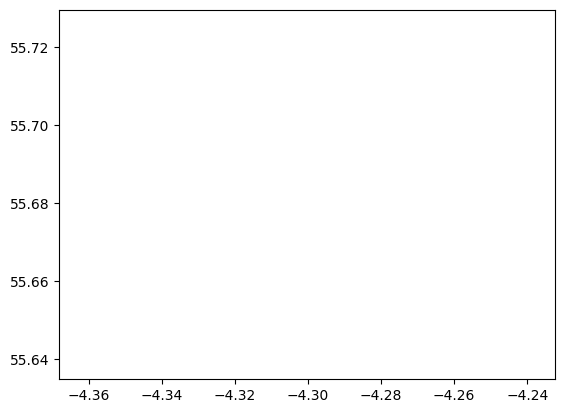

In [13]:
generate_map(merged_dataset)

In [15]:
merged_dataset.sum()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    hour     int64 0
Data variables:
    net      float64 0.0